# Customer Segmentation with RFM Analysis

- Recency : The freshness of the customer activity, be it purchases or visits
    - E.g. Time since last order or last engaged with the product
- Frequency : The frequency of the customer transactions or visits
    - E.g. Total number of transactions or average time between transactions/engaged visits
- Monetary : The intention of customer to spend or purchasing power of customer
    - E.g. Total or average transactions value

**RFM principle to cluster customers using K-means**
- There are lots of ways to classify customers and divided them by groups. 
- When you have data -- like a list of customers and what they buy -- and you need to create groups with similar characterestics using this data, we need a clustering approach.
- Performing RFM Analysis to segment and target customers to enrich planning of marketing spend, formulating a new promotion and thus maximize the return on marketing investments.
- Under RFM analysis, each customer is scored based on three factors, namely Recency, Frequency and Monetary value.
    - Recency:
        - The most important predictor of who is more likely to respond to an offer.
        - Customers who have purchased recently from you are more likely to purchase again from you compared to those who did not purchase recently.
    - Frequency:
        - How frequently these customers purchase from you.
        - The higher the frequency, the higher is the chances of them responding to your offers.
    - Monetary:
        - The amount of money these customers have spent on purchases.
        - Customers who have spent higher are more likely to purchase based in the offer compared to those who have spent less.

**Clustering**
- Clustering is part of the unsupervised machine learning techniques.
- It is unsupervised as the machine has no previous information about how it should group the entities.
- They try to create clusters with similar entities by analysing how close they are one from another.

**RFM Analysis**
- To perform RFM analysis, each customer is assigned a score for recency, frequency, and monetary value, and then a final RFM score is calculated.
    - Recency score is calculated based on the date of their most recent purchase.
    - The score are generally based on the values.
        - For example, a company may follow a category system of 1 to 5 score, score of 5 being the highest.
        - In this case, customers who purchased within the last month have a recency score of 5.
        - Customers who purchased within the last 1-3 months have a score of four and so on.
    - Frequency score is calculated based on number of times the customers purchased.
    - Customers with higher frequency receive a higher score.
    - Monetary score are based on the amount they spent on their purchases.
    - For calculating this, we may need to consider the actual amount spent or avergae spent per visit.
- By Combining these three scores, a final RFM score is calculated. The customers with the highest RFM score are cosnidered to be the ones that are most likely to respond to their offers.

**Customer Segmentation**
- RFM analysis can help retailers segment the customers and design offers and promotions based on their profile.
    - Customers with an overall high RFM score represent the best customers.
    - Customers who have a high overall RFM score but a frequency score of 1 are new customers. The company can provide special offers for these customers in order to increase their visits.
    - Customers who have a high frequency score but a low recency score are those customers that used to visit quite often but have not been visiting recently. For these customers, the company needs to offer promotions to bring them back to the store, or run surveys to find out why they abandoned the store.
    - RFM scores can be analysed together with the results of the campaigns to eliminate non-responsive customers and further improve the campaigns.
    - RFM score can be analysed together with the products they purchase to design highly targeted offers for each customer segment. R- FM score can be analysed together with other information about the customers such as their income levels, gender, whether they own a vehicle or nor, etc. to segment the customers.

**RFM Limitations**
- The primary limitation of RFM model is the absence of Length entity.
    - RFM model lacks of smart linking between the three indices.
    - The customer segmentation used in it. Most of the analysts usually split in customer values into 5 bands.
    
**LRFM Takes INitial RFM Model to Next Level**
- Various studies have concluded that the addition of an extra variable to the initial RFM Model can magnify its predictability of customer behaviors.
- Just an addition of customer relation length (L) to RFM Model results in the extended reliability and accuracy of customer segments. By adopting the traditional RFM Model, companies cannot distinguish between the long-term and short-term customers, which becomes possible with the LRFM Model.
- The inclusion of Length Element (L) to the RFM Model resolves the inability to properly analyze different product demands at different times. In order to identify the most loyal customers of a company, it is essential to consider the Length of customer relation.
- The objective of adapting and implementing any of RFM and LRFM Model is to build revenue generating customer segments. No doubt, LRFM Model is much more favorable than RFM Model to get the desired productivity.

**Data**
- This data set is composed of 8 attributes and 541909 instances showing all the transactions occurring between 01/12/2017 and 09/12/2020 for a UK-based online retail.
- Attributes Information
    - **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
    - **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
    - **Description: Product (item) name. Nominal.
    - **Quantity**: The quantities of each product (item) per transaction. Numeric.
    - **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
    - **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
    - **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
    - **Country**: Country name. Nominal, the name of the country where each customer resides.

# Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
retail = pd.read_csv('https://raw.githubusercontent.com/insaid2018/INSAIDThursdays/master/Data/OnlineRetail.csv')

# Explore Data

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,560233,22610,PENS ASSORTED FUNNY FACE,36,11/16/2018 11:10,0.19,16813,United Kingdom
1,545085,22417,PACK OF 60 SPACEBOY CAKE CASES,1,6/30/2018 11:19,0.55,15039,United Kingdom
2,563567,23035,DRAWER KNOB CERAMIC IVORY,6,12/17/2018 14:44,1.45,13004,United Kingdom
3,537603,22419,LIPSTICK PEN RED,12,4/8/2018 12:49,0.42,14673,United Kingdom
4,570218,22470,HEART OF WICKER LARGE,12,2/8/2019 12:20,2.95,16873,United Kingdom


In [4]:
retail.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

# Preprocess Data for RFM Analysis

In [5]:
from Clustering import Preprocessing
preprocess = Preprocessing()
preprocess.fix_data(retail)
retail.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

# RFM Analysis

In [6]:
from Clustering import RFMAnalysis
rfm_analysis = RFMAnalysis()

**Extract Day from InvoiceDate**

In [7]:
rfm_analysis.extract_day(retail)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,560233,22610,PENS ASSORTED FUNNY FACE,36,2018-11-16 11:10:00,0.19,16813,United Kingdom,2018-11-16
1,545085,22417,PACK OF 60 SPACEBOY CAKE CASES,1,2018-06-30 11:19:00,0.55,15039,United Kingdom,2018-06-30
2,563567,23035,DRAWER KNOB CERAMIC IVORY,6,2018-12-17 14:44:00,1.45,13004,United Kingdom,2018-12-17
3,537603,22419,LIPSTICK PEN RED,12,2018-04-08 12:49:00,0.42,14673,United Kingdom,2018-04-08
4,570218,22470,HEART OF WICKER LARGE,12,2019-02-08 12:20:00,2.95,16873,United Kingdom,2019-02-08


**Print range of dates available in the Data**

In [8]:
rfm_analysis.min_max_day(retail)

Min : 2018-04-02 00:00:00
Max : 2019-04-10 00:00:00


**Calculate RFM values for each customer**

In [9]:
rfm = rfm_analysis.calculate_rfm(retail)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,2,63,1456.15
12348,75,12,836.36
12349,18,17,376.36
12350,310,8,142.50
12352,36,30,965.60


**Calculate RFM Score for each customer**

- Note:For example, if binning an ‘age’ column, we know infants are between 0 and 1 years old, 1-12 years are kids, 13-19 are teenagers, 20-60 are working class grownups, and 60+ senior citizens. So we can appropriately set bins=[0, 1, 12, 19, 60, 140] and labels=[‘infant’, ‘kid’, ‘teenager’, ‘grownup’, ‘senior citizen’]. In qcut, when we specify q=5, we are telling pandas to cut the Year column into 5 equal quantiles, i.e. 0-20%, 20-40%, 40-60%, 60-80% and 80-100% buckets/bins.

In [10]:
rfm_analysis.rfm_score(rfm)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347,2,63,1456.15,4,4,4,444,12
12348,75,12,836.36,2,2,4,224,8
12349,18,17,376.36,4,3,3,433,10
12350,310,8,142.50,1,2,2,122,5
12352,36,30,965.60,3,3,4,334,10


**RFM_Segment: 111 indicates Low Value Customer**

In [11]:
rfm_analysis.rfm_111(rfm)

            Recency  Frequency  Monetary
CustomerID                              
12353           204          1     17.70
12373           311          2     56.70
12401           303          3     40.95
12402           323          3     58.50
12414           217          2     72.70


**RFM_Segment: 444 indicates High Value Customer**

In [12]:
rfm_analysis.rfm_444(rfm)

            Recency  Frequency  Monetary
CustomerID                              
12347             2         63   1456.15
12362             3         79   1668.49
12417             3         56   1065.97
12423             0         36    510.84
12433             0        143   4606.96


**Assign the following labels to each customer based on their RFM Score:Gold,Silver,Bronze,Green**

In [13]:
rfm_analysis.assign_labels(rfm)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12347,2,63,1456.15,4,4,4,444,12,Gold
12348,75,12,836.36,2,2,4,224,8,Silver
12349,18,17,376.36,4,3,3,433,10,Silver
12350,310,8,142.50,1,2,2,122,5,Green
12352,36,30,965.60,3,3,4,334,10,Silver


# Clustering customers using Machine Learning

**K Means Clustering**

In [14]:
from Clustering import K_Means
k_means = K_Means()

**Preprocessing Data for performing K Means Clustering**

In [15]:
processed_data = k_means.preprocesser(rfm)

**Find appropriate k value for clustering**

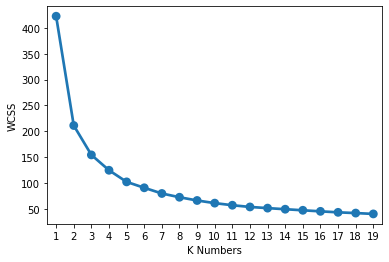

In [16]:
k_means.elbow_plot(processed_data)

- From graph, optimal number of clusters is 6

**Form Clusters**

In [17]:
k_means.make_clusters(processed_data,rfm)

array([3, 1, 5, ..., 0, 3, 1])

**Examine which customer belongs to which cluster**

In [20]:
processed_data.head()

,Recency,Frequency,Monetary,K_Cluster
CustomerID,,,,
12347,0.882979,0.535064,0.634013,3
12348,0.271023,0.320935,0.584179,1
12349,0.511989,0.365879,0.512526,5
12350,0.031239,0.268501,0.425249,4
12352,0.394799,0.439235,0.597109,1


In [22]:
clust0 = processed_data[processed_data['K_Cluster']==0]
clust0.to_csv('clust0.csv')
clust1 = processed_data[processed_data['K_Cluster']==1]
clust1.to_csv('clust1.csv')
clust2 = processed_data[processed_data['K_Cluster']==2]
clust2.to_csv('clust2.csv')
clust3 = processed_data[processed_data['K_Cluster']==3]
clust3.to_csv('clust3.csv')
clust4 = processed_data[processed_data['K_Cluster']==4]
clust4.to_csv('clust4.csv')
clust5 = processed_data[processed_data['K_Cluster']==5]
clust5.to_csv('clust5.csv')

# Visualizing Clusters

<IPython.core.display.Javascript object>


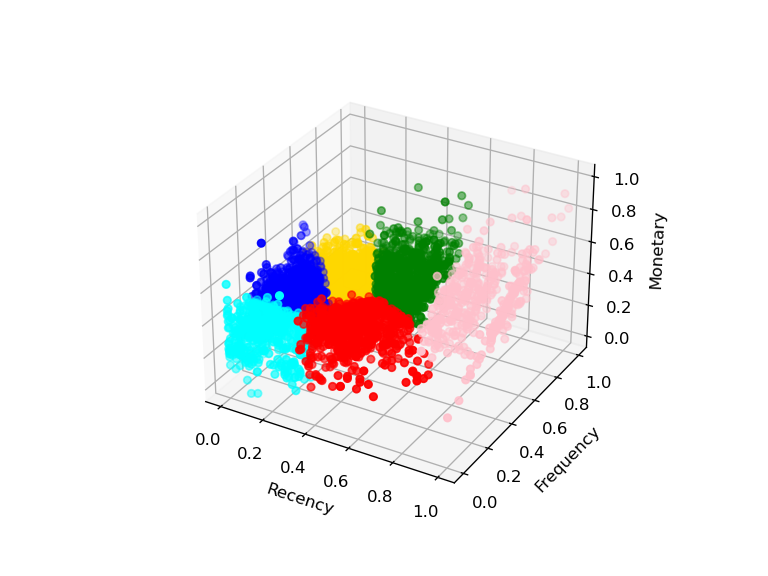

In [23]:
%matplotlib notebook
from Visualize import Visualize_Cluster
Visualize_Cluster.plot(rfm)